In [1]:
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
from matplotlib.gridspec import GridSpec
from scipy.stats import norm
import scipy as sp
from scipy.integrate import odeint,quad,simps,trapezoid,cumtrapz
from scipy.special import eval_hermite,eval_hermitenorm,erfinv
from math import sqrt,sin,pi,cos,exp,log,factorial
from scipy.spatial import KDTree
from IPython.core.display import display, HTML
import sys
sys.path.append(r'/mnt/c/Users/Alejandro Lopez/Imperial College London/MSc Project - Alejandro López - MA - General/repository')
figures_route = r'/mnt/c/Users/Alejandro Lopez/Imperial College London/MSc Project - Alejandro López - MA - General/MSc Project - Latex/Figures/'
from nonparametric_generator import *
import tikzplotlib
import matplotlib
def pgf_switch(setting = 'off'):
    if setting == 'off':
        matplotlib.use('module://ipykernel.pylab.backend_inline')
        matplotlib.rcParams.update({
            "pgf.texsystem": "xelatex",
            'font.family': ['sans-serif'],
            'text.usetex': False,
            'pgf.rcfonts': True,
        })
    else:
        matplotlib.use("pgf")
        matplotlib.rcParams.update({
            "pgf.texsystem": "pdflatex",
            'font.family': 'serif',
            'text.usetex': True,
            'pgf.rcfonts': False,
        })
display(HTML("<style>.container { width:95% !important; }</style>"))
# plt.style.use('dark_background')
# plt.style.use('default')

# Estimation of the operator $D^{-1}\mathcal{L}$

### Deterministic generation of points given the OU invariant distribution

$$x_i =F^{-1} (\bar{x}_i)$$

In [2]:
V = lambda x:  (5/6)*x**6 - (5/2)*x**4
DV = lambda x:  5*x**5 - 10*x**3
D = 1
Z = trapezoid(x = np.linspace(-10,10,2000),y = [np.exp(-V(x)/D) for x in np.linspace(-10,10,2000)])
rho_inf = lambda x : (1/Z) * np.exp(-V(x)/D)
x = np.linspace(-4,4,10000)
F = cumtrapz(x =x,y = rho_inf(x))

In [3]:
N = 5000
x_bar = np.linspace(1e-10,1-1e-10,N)

In [4]:
X = np.zeros((N,1))
for i in range(N):
    X[i] = (x[:-1][F>x_bar[i]])[0]
X_s = X

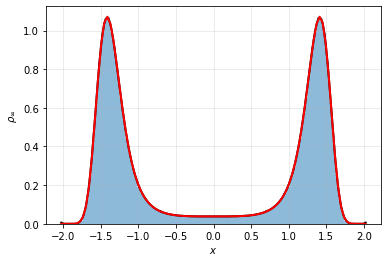

In [5]:
pgf_switch('off')
p_eq = density_estimation(X, 0.01)
_ = plt.plot(np.linspace(min(X),max(X),200),[p_eq([x]) for x in np.linspace(min(X),max(X),200)],color='k',lw=2)
# _ = plt.plot(X,[(1/320)*q_0(x) for x in X[:,0]])
_ = plt.plot(np.linspace(min(X),max(X),100),[rho_inf(x) for x in np.linspace(min(X),max(X),100)],color='r',lw=2)
_ = plt.hist(X,density=True,alpha=0.5,bins=100)
_ = plt.grid(alpha=0.3)
_ = plt.xlabel('$x$')
_ = plt.ylabel('$\\rho_{\infty}$')

epsilon = 6.17e-06
d = 1.00


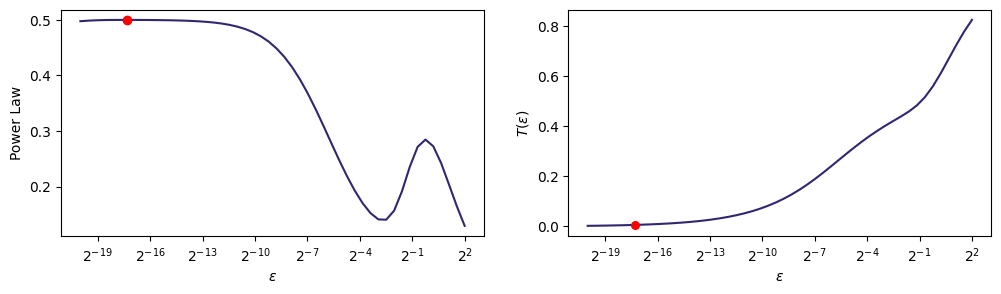

In [6]:
epsilon, d = bandwidth_search(X_s,plot=True,verbose=True)

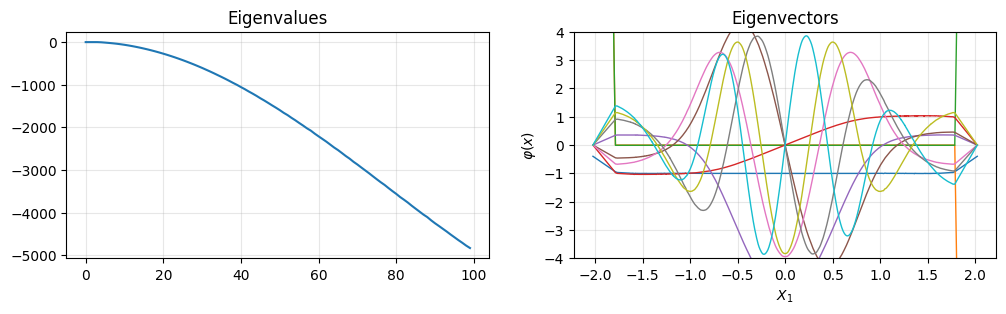

In [7]:
l, phi,L_e, U = KNPGenerator(X_s,M=100,plot=True,return_extra=True,epsilon_0=0.01)
phi_1 = np.linalg.pinv(phi)

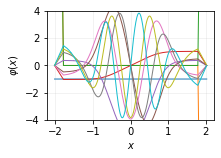

In [8]:
setting = 'off'
pgf_switch(setting)
plt.figure(figsize=(3,2))
for i in range(10):
    plt.plot(X_s,phi[:,i],lw=1)
plt.ylim(-4,4)
plt.grid(alpha=0.2)
plt.xlabel('$x$')
plt.ylabel('$\\varphi(x)$')

if setting == 'on':
    _ = plt.savefig(figures_route + 'DWeigenfunct.pgf', bbox_inches='tight', pad_inches=0)
    _ = plt.close()

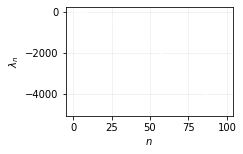

In [9]:
setting = 'off'
pgf_switch(setting)
plt.figure(figsize=(3,2))
plt.plot(l,color='w',lw=1)
plt.xlabel('$n$')
plt.ylabel('$\\lambda_n$')
plt.grid(alpha=0.2)
if setting == 'on':
    _ = plt.savefig(figures_route + '1dOUeigenvalues.pgf', bbox_inches='tight', pad_inches=0)
    _ = plt.close()

(-15.0, 15.0)

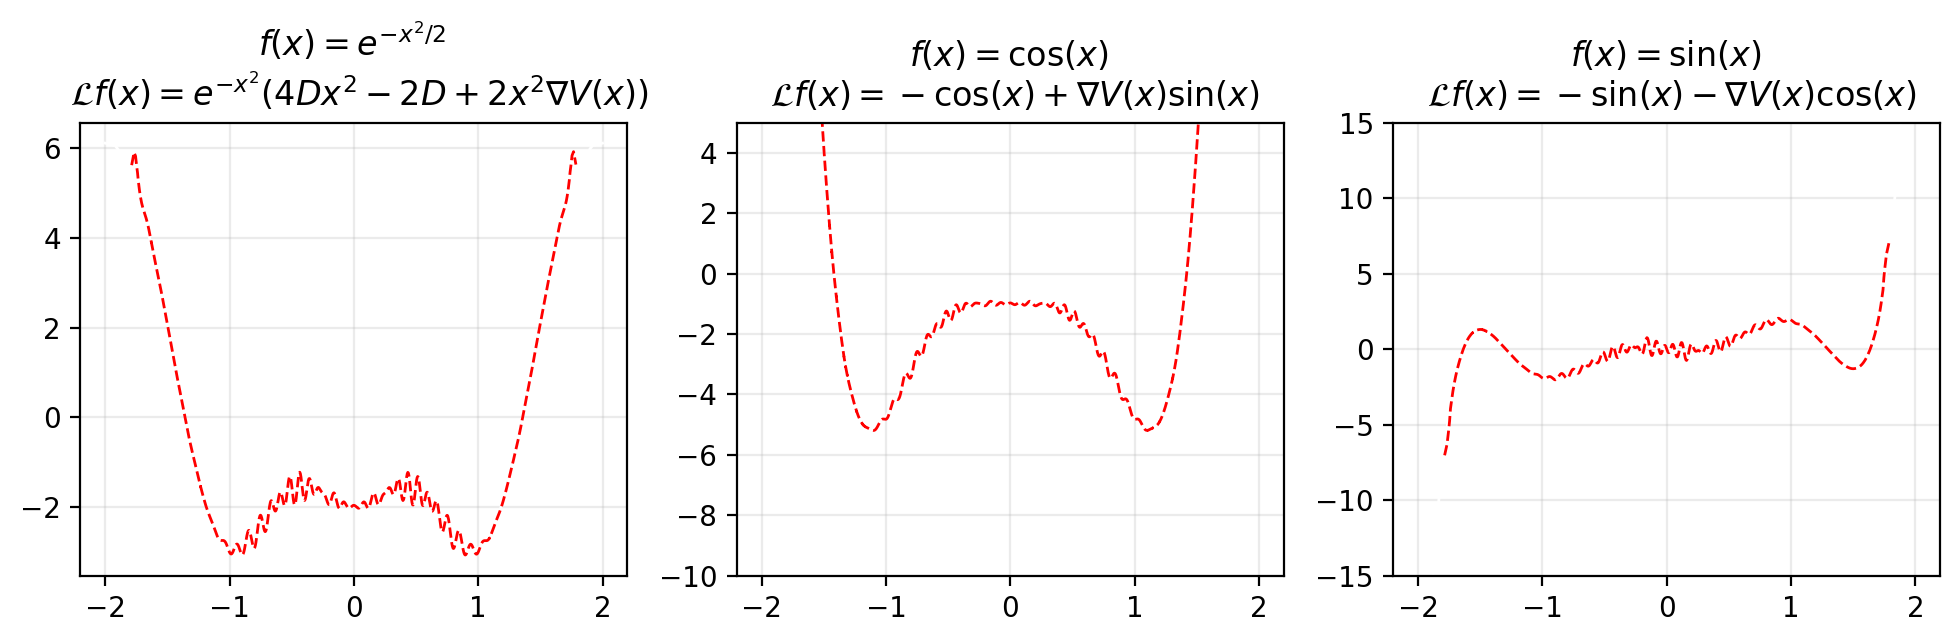

In [10]:
fig,axs = plt.subplots(1,3,figsize=(12,3),dpi=200)

x = np.linspace(-2,2)

Y = np.exp(-X_s[:,0]**2)
c_coef = D*(phi_1@Y)
axs[0].set_title("$f(x) =e^{-x^2/2} $ \n $\mathcal{L}f(x) = e^{-x^2}(4Dx^2-2D + 2x^2\\nabla V(x)) $")
axs[0].plot(x, D*np.exp(-x**2)*(4*x**2-2) + DV(x)*2*x*np.exp(-x**2),color='w',lw=1)
axs[0].plot(X_s[1:-1,:],np.sum((c_coef*l) * phi,axis=1)[1:-1],color='r',lw=1,ls='--')
# axs[0].scatter(X_s,D*L_e@Y,s=2,color='b',alpha=0.5)
axs[0].grid(alpha=0.25)

Y = np.cos(X_s[:,0])
c_coef =D*(phi_1@Y)
axs[1].set_title("$f(x) =\cos(x) $ \n $\mathcal{L}f(x) = -\cos(x)+\\nabla V(x)\sin(x) $")
axs[1].plot(x,-D*np.cos(x) + DV(x) * np.sin(x),color='w',lw=1)
axs[1].plot(X_s[1:-1,:],np.sum((c_coef*l) * phi,axis=1)[1:-1],color='r',lw=1,ls='--')
# axs[1].scatter(X_s,D*L_e@Y,s=2,color='b',alpha=0.5)
axs[1].grid(alpha=0.25)
axs[1].set_ylim(-10,5)

Y = np.sin(X_s[:,0])
c_coef = D*(phi_1@Y)
axs[2].set_title("$f(x) =\sin(x) $ \n $\mathcal{L}f(x) = -\sin(x)-\\nabla V(x)\cos(x) $")
axs[2].plot(x,-D*np.sin(x) - DV(x) * np.cos(x),color='w',lw=1)
axs[2].plot(X_s[1:-1,:],np.sum((c_coef*l) * phi,axis=1)[1:-1],color='r',lw=1,ls='--')
# axs[2].scatter(X_s,D*L_e@Y,s=2,color='b',alpha=0.5,label='Multiply the matrix')

axs[2].grid(alpha=0.25)
axs[2].set_ylim(-15,15)

(-13.0, 13.0)

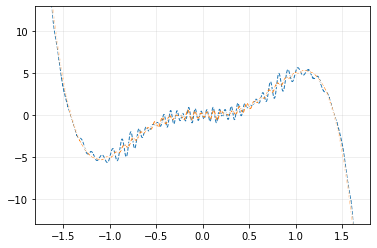

In [11]:
setting = 'off'
pgf_switch(setting)
Y = X_s[:,0]
c_coef =  (D/N)* Y@U
c_coef1 = (D) * phi_1 @ Y
plt.plot(np.sort(X_s,axis=0),np.sum((c_coef*l) * phi,axis=1)[np.argsort(X_s,axis=0)],lw=1,ls='--')
plt.plot(np.sort(X_s,axis=0),np.sum((c_coef1*l) * phi,axis=1)[np.argsort(X_s,axis=0)],lw=1,ls='--')
plt.plot(x, - DV(x) ,color='w',lw=1)
plt.grid(alpha=0.25)
plt.xlim(-1.8,1.8)
plt.ylim(-13,13)

# Push-forward of a initial density $p_0(x)$

### 1. Estimate the initial condition $c_i(0)$ as $$\hat{c}_i(0)=\frac{1}{N}\sum_{j=1}^N \frac{p_0(x_j)}{\hat{p}_{\text{eq}}(x_j)}\varphi_i(x_j) $$

In [12]:
p_0 = np.vectorize(lambda x: sp.stats.norm.pdf(x,0,1))
p_eq = density_estimation(X_s)
rho_eq = np.vectorize(lambda x: p_eq(x)[0])
c_0 = (1/len(X_s)) * np.sum(((p_0(X_s)/rho_eq(X_s))) * phi,axis=0)
init = 0
tf = 1
Nt = 100
tarray = np.linspace(0,tf,Nt)
csol = np.exp(tarray[:,None] * l[None,:] * D ) * c_0

### 3. Using $M$ modes estimate the density  as $$\hat{p}(x,t) =\hat{p}_{\text{eq}}(x) \sum_{i=0}^M \hat{c}_i(t)\varphi_i(x)$$

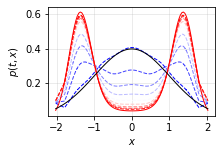

In [13]:
setting = 'off'
pgf_switch(setting)


X_sort = np.sort(np.ravel(X_s))
N = len(X_s)
dx = np.diff(X_sort)
fig, axs = plt.subplots(1, 1,figsize=(3,2))

for t in np.arange(1,100,12):
    est_density = p_eq(X_s.T)* np.sum(phi * csol[t],axis=1)

    est_density=est_density[np.argsort(np.ravel(X_s))]
    cum = trapezoid(x=X_sort,y= est_density.T)
    plt.plot(X_sort,(1/cum) *est_density,lw=1,color=plt.cm.bwr(t/100),ls='--')
    
    
plt.plot(np.linspace(min(X_s),max(X_s),100),p_eq(np.linspace(min(X_s),max(X_s),100).T),
         color='r',lw=1)
plt.plot(np.linspace(min(X_s),max(X_s),100),p_0(np.linspace(min(X_s),max(X_s),100)),
         color='k',lw=1)
plt.xlabel('$x$')
plt.ylabel('$p(t,x)$')
plt.grid(alpha=0.3)
# fig.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0,1), cmap=plt.cm.bwr),ax= axs,label='Time')
if setting == 'on':
    _ = plt.savefig(figures_route +'1dDWdensities.pgf', bbox_inches='tight', pad_inches=0)
    _ = plt.close()

# Push-forward of obserbable $f(x)$


In [14]:
Lambda = np.diag(l)
D = 1
def RHS(y,t):
    return((D*Lambda) @ y)

init = 0
tf = 5
Nt = 100
tarray = np.linspace(0,tf,Nt)

csol = odeint(RHS,c_0,tarray,args=())

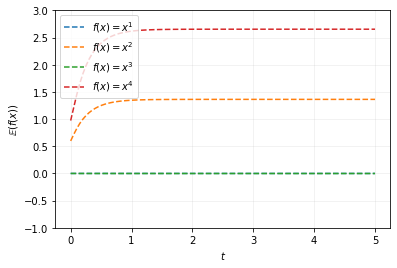

In [15]:
for p in [1,2,3,4]:
    N = len(X_s)
    f = X_s[:,0]**p
    a = (1/N)*(f @ phi)
    plt.plot(np.linspace(0,5,100),csol @ a,'--',label=f'$f(x) = x^{p}$')
plt.grid(alpha=0.2)
plt.xlabel('$t$')
plt.ylim(-1,3)
plt.ylabel('$\mathbb{E}(f(x))$')
plt.legend()

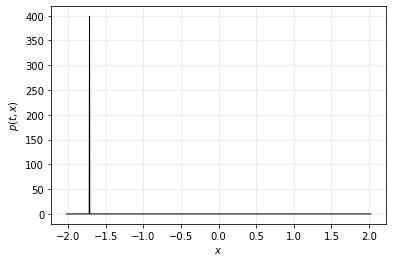

In [16]:
setting = 'off'
pgf_switch(setting)

p_0 = np.vectorize(lambda x: sp.stats.norm.pdf(x,X_s[10,0],0.001))
p_eq = density_estimation(X_s)
rho_eq = np.vectorize(lambda x: p_eq(x)[0])
c_0 = (1/len(X_s)) * np.sum(((p_0(X_s)/rho_eq(X_s))) * phi,axis=0)
init = 0
tf = 1
Nt = 100
tarray = np.linspace(0,tf,Nt)
csol = np.exp(tarray[:,None] * l[None,:] * D ) * c_0


X_sort = np.sort(np.ravel(X_s))
N = len(X_s)
dx = np.diff(X_sort)
fig, axs = plt.subplots(1, 1,figsize=(6,4))

for t in np.arange(1,100,12):
    est_density = p_eq(X_s.T)* np.sum(phi * csol[t],axis=1)

    est_density=est_density[np.argsort(np.ravel(X_s))]
    cum = trapezoid(x=X_sort,y= est_density.T)
#     plt.plot(X_sort,(1/cum) *est_density,lw=1,color=plt.cm.bwr(t/100),ls='--')
    
    
# plt.plot(np.linspace(min(X_s),max(X_s),100),p_eq(np.linspace(min(X_s),max(X_s),100).T),
#          color='r',lw=1)
plt.plot(X_s,p_0(X_s),
         color='k',lw=1)
plt.xlabel('$x$')
plt.ylabel('$p(t,x)$')
plt.grid(alpha=0.3)
# fig.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0,1), cmap=plt.cm.bwr),ax= axs,label='Time')
if setting == 'on':
    _ = plt.savefig(figures_route +'1dDWdensities.pgf', bbox_inches='tight', pad_inches=0)
    _ = plt.close()

In [5]:
setting = 'off'
pgf_switch(setting)

x_space = X_s[1000:4000,0]

Koopman = np.zeros((25,len(x_space)))
p_eq = density_estimation(X_s)
for i,y in enumerate(x_space):    
    c_0 = phi[1000+i,:]
    init = 0
    tf = 30
    Nt = 25
    tarray = np.linspace(0,tf,Nt)
    csol = np.exp(tarray[:,None] * l[None,:] * D ) * c_0

   
    f = np.cos(X_s[:,0]*2*np.pi)
    a = (1/N)*(f @ phi)
    Koopman[:,i] = csol @ a
fig,ax = plt.subplots(1,1,figsize=(3,2))
for j in range(Koopman.shape[0]):
    ax.plot(x_space, Koopman[j,:],color=plt.cm.viridis(j/(Koopman.shape[0])))
ax.grid(alpha=0.3)
ax.set_xlabel('$x$')
ax.set_ylabel('$\mathcal{K}^{t}\cos(2\pi x)$')
fig.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0,tf), cmap=plt.cm.viridis),ax= ax,label='Time, t')
if setting == 'on':
    _ = plt.savefig(figures_route +'1dDWKoopman_cos.pgf', bbox_inches='tight', pad_inches=0)
    _ = plt.close()

NameError: name 'X_s' is not defined

In [36]:
Koopman[-1,:]

array([1.71673916, 1.71673916, 1.71673916, ..., 1.71673909, 1.71673909,
       1.71673909])

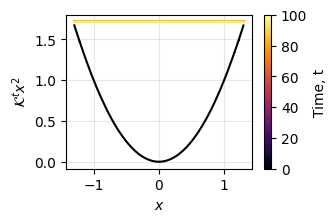

In [35]:
setting = 'off'
pgf_switch(setting)
# x_space = np.linspace(-2,2,100)
x_space = X_s[1500:3500,0]

Koopman = np.zeros((25,len(x_space)))
p_eq = density_estimation(X_s)
for i,y in enumerate(x_space):    
    c_0 = phi[1500+i,:]
    init = 0
    tf = 100
    Nt = 25
    tarray = np.linspace(0,tf,Nt)
    csol = np.exp(tarray[:,None] * l[None,:] * D ) * c_0

   
    f = X_s[:,0]**2
    a = (1/N)*(f @ phi)
    Koopman[:,i] = csol @ a
fig,ax = plt.subplots(1,1,figsize=(3,2))
for j in range(Koopman.shape[0]):
    ax.plot(x_space, Koopman[j,:],color=plt.cm.inferno(j/(Koopman.shape[0])))
ax.grid(alpha=0.3)
ax.set_xlabel('$x$')
ax.set_ylabel('$\mathcal{K}^{t}x^2$')
fig.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0,tf), cmap=plt.cm.inferno),ax= ax,label='Time, t')
if setting == 'on':
    _ = plt.savefig(figures_route +'1dDWKoopman_square.pgf', bbox_inches='tight', pad_inches=0)
    _ = plt.close()